In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import itertools

In [46]:
csv_file = "sample_data.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u-g.values
g_r = g-r.values
r_i = r-i.values
i_z = i-z.values

# pair
ug_gr = np.column_stack((u_g, g_r))
ug_ri = np.column_stack((u_g, r_i))
ug_iz = np.column_stack((u_g, i_z))
gr_ri = np.column_stack((g_r, r_i))
gr_iz = np.column_stack((g_r, i_z))
ri_iz = np.column_stack((r_i, i_z))
# print(ug_gr)

# trios
ug_gr_ri = np.column_stack((u_g, g_r, r_i))
ug_gr_iz = np.column_stack((u_g, g_r, i_z))
ug_ri_iz = np.column_stack((u_g, r_i, i_z))
gr_ri_iz = np.column_stack((g_r, r_i, i_z))
# print(ug_gr_ri)

# all together
ug_gr_ri_iz = np.column_stack((u_g, g_r, r_i, i_z))
# print(ug_gr_ri_iz)

list_of_indices = [u_g, g_r, r_i, i_z, ug_gr, ug_ri, ug_iz, gr_ri, gr_iz,
                   ri_iz, ug_gr_ri, ug_gr_iz, ug_ri_iz, gr_ri_iz, ug_gr_ri_iz]
list_of_df = []
for item in list_of_indices:
    list_of_df.append(pd.DataFrame(item))

# Effective temperature of star
y = df['Teff']

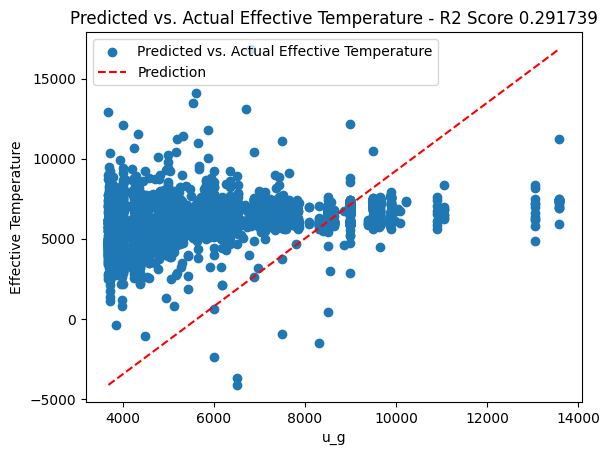

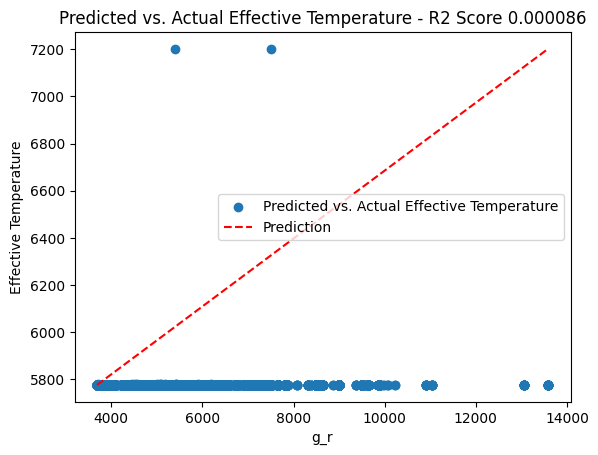

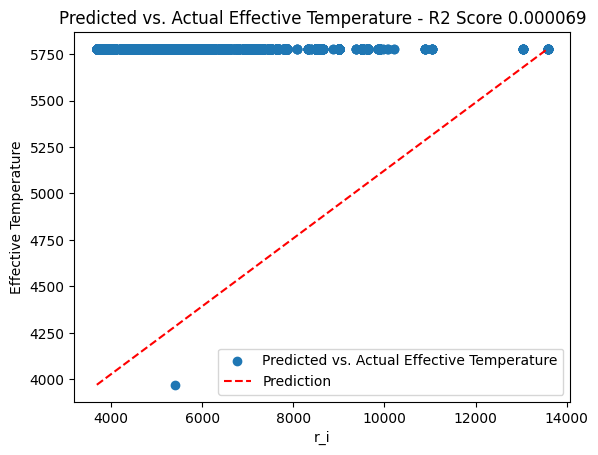

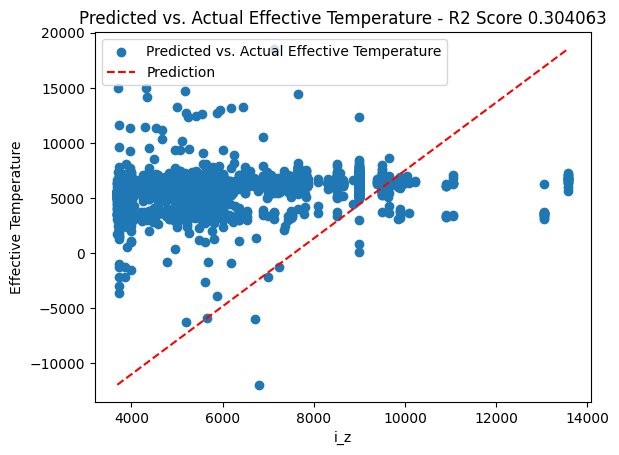

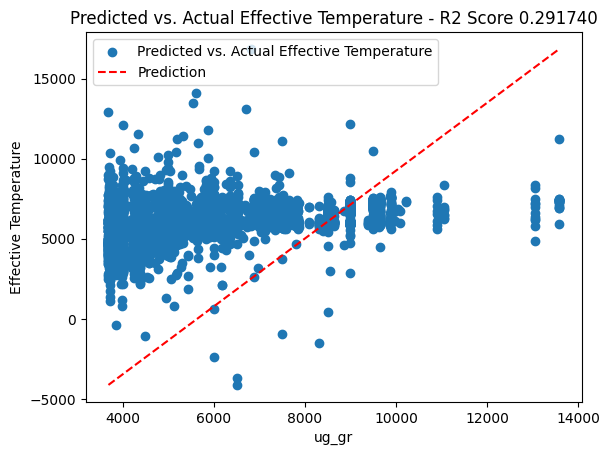

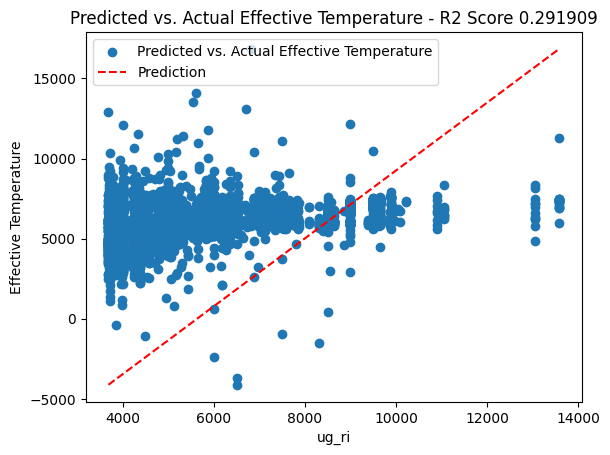

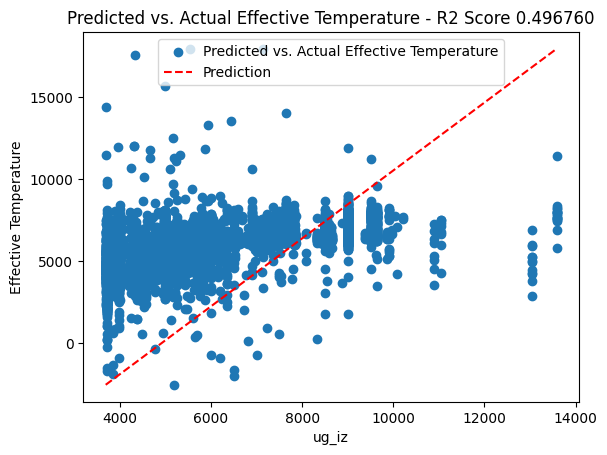

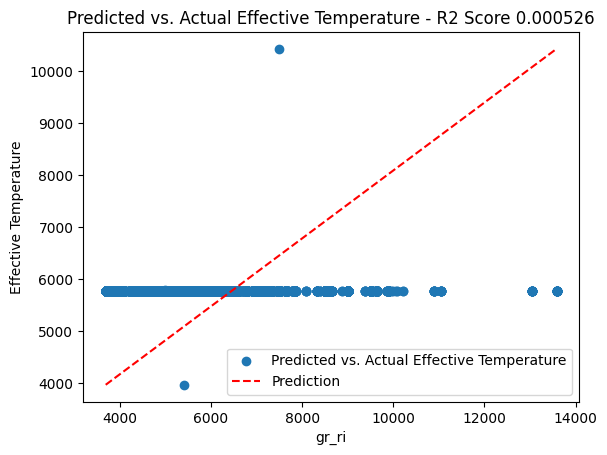

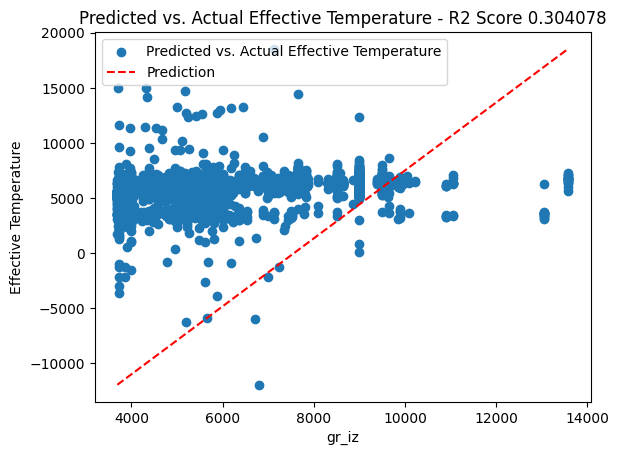

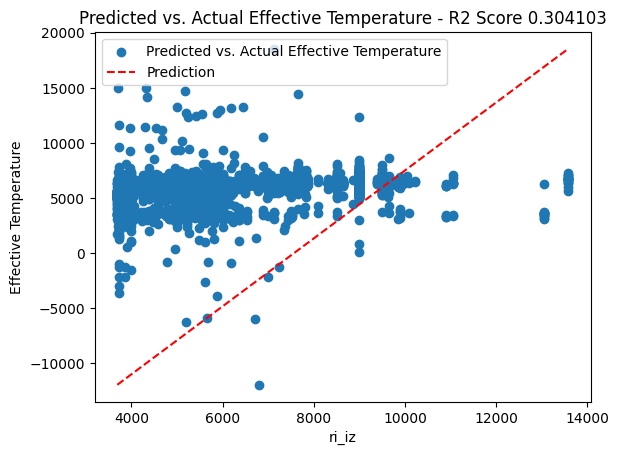

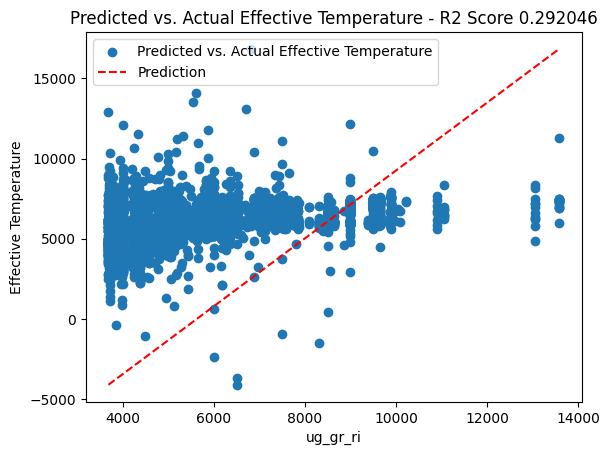

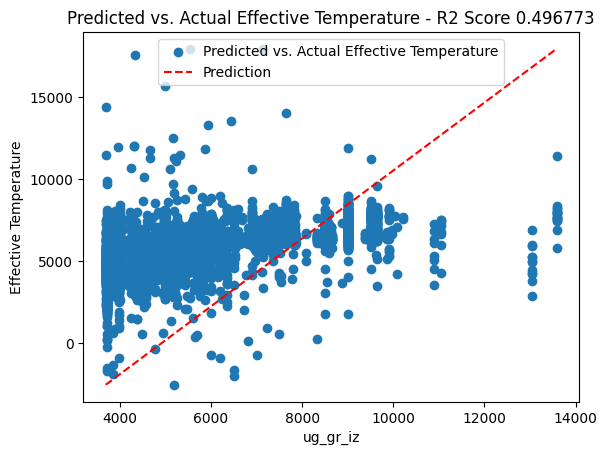

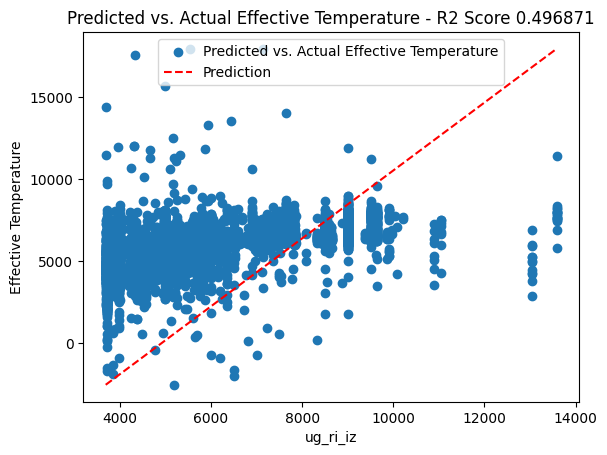

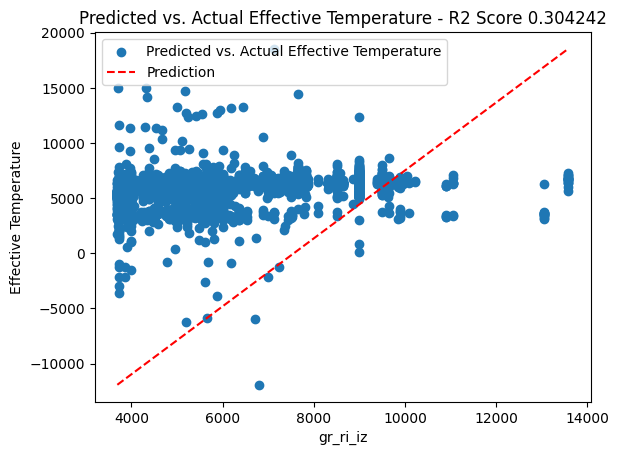

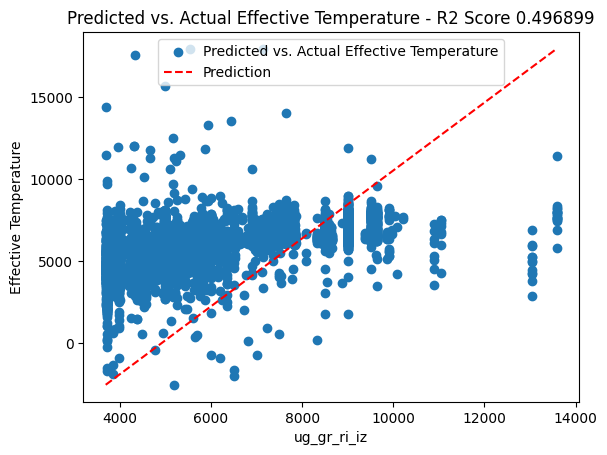

In [49]:
string_list = [
    "u_g",
    "g_r",
    "r_i",
    "i_z",
    "ug_gr",
    "ug_ri",
    "ug_iz",
    "gr_ri",
    "gr_iz",
    "ri_iz",
    "ug_gr_ri",
    "ug_gr_iz",
    "ug_ri_iz",
    "gr_ri_iz",
    "ug_gr_ri_iz"
]

for index, name in zip(list_of_df, string_list):
    x_train, x_test, y_train, y_test = train_test_split(
        index, y, test_size=0.2, random_state=42) 
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    predictions = regr.predict(x_train)
    r2 = r2_score(y_train, predictions)

    plt.scatter(y_train, predictions, label="Predicted vs. Actual Effective Temperature")
    plt.plot([y_train.min(), y_train.max()], [predictions.min(), predictions.max()], color='red', linestyle='--', label='Prediction')
    plt.xlabel(name)
    plt.ylabel('Effective Temperature')
    plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(r2))
    plt.legend()
    plt.show()